In [1]:
#!pip install Pillow

In [20]:
from PIL import Image
img = Image.open("simba.png")
img.show()

In [12]:
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 250 px, hauteur : 263 px


In [17]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : L
Valeur du pixel situé en (20,100) : 196


In [19]:
import numpy as np
mat = np.array(img)
mat

array([[247, 245, 245, ..., 224, 228, 228],
       [246, 244, 243, ..., 228, 230, 230],
       [244, 242, 240, ..., 230, 231, 231],
       ...,
       [183, 169, 169, ..., 108,  95, 102],
       [170, 160, 171, ...,  81,  95,  99],
       [150, 155, 174, ..., 133, 115, 111]], dtype=uint8)

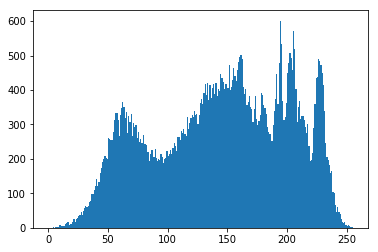

In [27]:
import matplotlib.pyplot as plt

# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(mat.flatten(), bins=range(256))
plt.show()

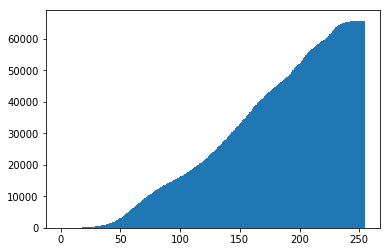

In [29]:
n, bins, patches = plt.hist(mat.flatten(), bins=range(256), cumulative=True)
plt.show()

In [30]:
mat_sous_exp = np.array(Image.open("simba_sousexp.png"))

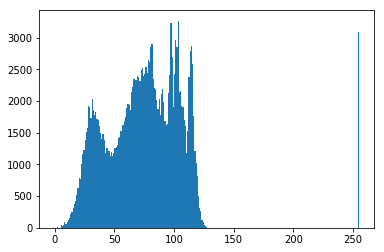

In [38]:
_ = plt.hist(mat_sous_exp.flatten(),bins=range(256))

In [44]:
from PIL import ImageOps
img_corrected = ImageOps.autocontrast(Image.fromarray(mat_sous_exp), cutoff=2)

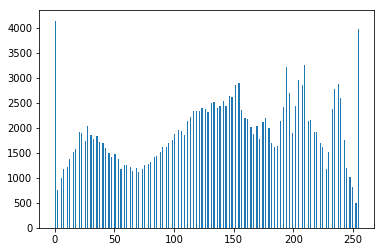

In [45]:
_ = plt.hist(np.array(img_corrected).flatten(), bins=range(256))

In [46]:
img_corrected.show()

In [47]:
#L'égalisation d'histogramme correspond à la fonction  PIL.ImageOps.equalize

In [73]:
# Générer le bruit gaussien de moyenne nulle et d'écart-type 7 (variance 49)
noise = np.random.normal(0,7, mat.shape)

# Créer l'image bruitée et l'afficher
noisy_img = Image.fromarray(mat+noise).convert('L')
noisy_img.show()

In [74]:
from PIL import ImageFilter

# Appliquer le lissage par moyennage (fenêtre de taille 9) et afficher le résultat
noisy_img.filter(ImageFilter.BoxBlur(1)).show()

In [ ]:
#Le filtre gaussien s'applique en Pillow avec la méthode  PIL.Image.filter et la classe
#PIL.ImageFilter.GaussianBlur , dont le paramètre radius  en entrée désigne σ. 